In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
import pandas as pd

import pickle

plt.rcParams["figure.figsize"] = (15,10)

# Setup

First, we retrieve the same LHC training dataset we used two weeks ago.

In [3]:
higgs = open('higgs_100000_pt_250_500.pkl', 'rb')
data_higgs = pickle.load(higgs)
higgs.close()

In [4]:
qcd = open('qcd_100000_pt_250_500.pkl', 'rb')
data_qcd = pickle.load(qcd)
qcd.close()

In [5]:
data_higgs

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [6]:
data_qcd

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


We will be faking a background of a Poisson distribution of mean 100.

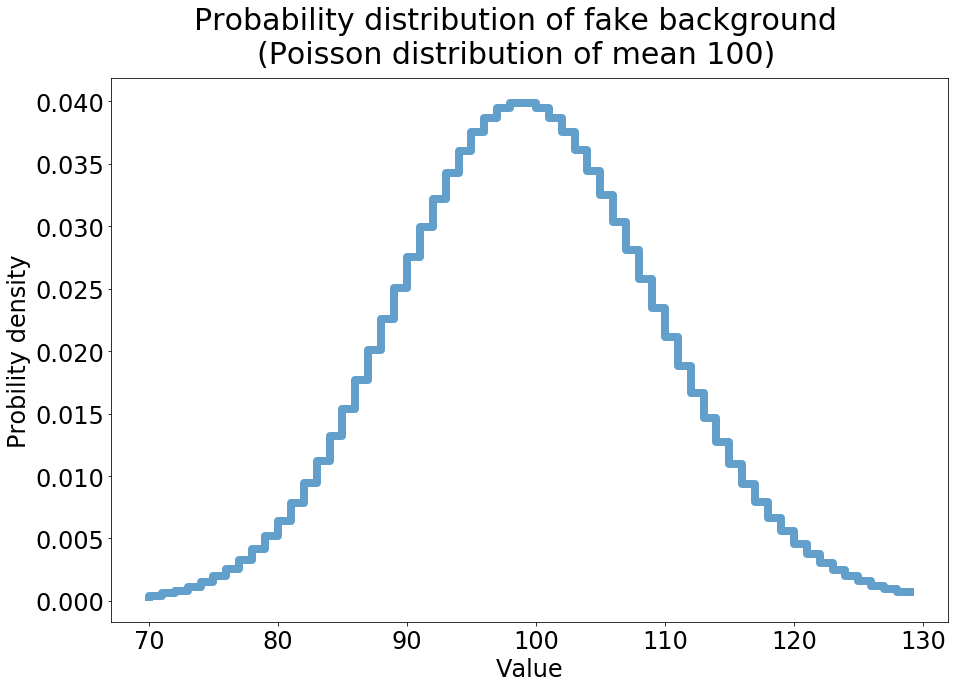

In [60]:
plt.suptitle('Probability distribution of fake background\n(Poisson distribution of mean 100)', fontsize=30)
plt.xlabel('Value', fontsize = 24)
plt.ylabel('Probility density', fontsize = 24)
plt.tick_params(labelsize = 24)
x = np.arange(70,130)
plt.step(x, stats.poisson.pmf(x, 100, loc=0), linewidth = 8,alpha = 0.7)
plt.show()

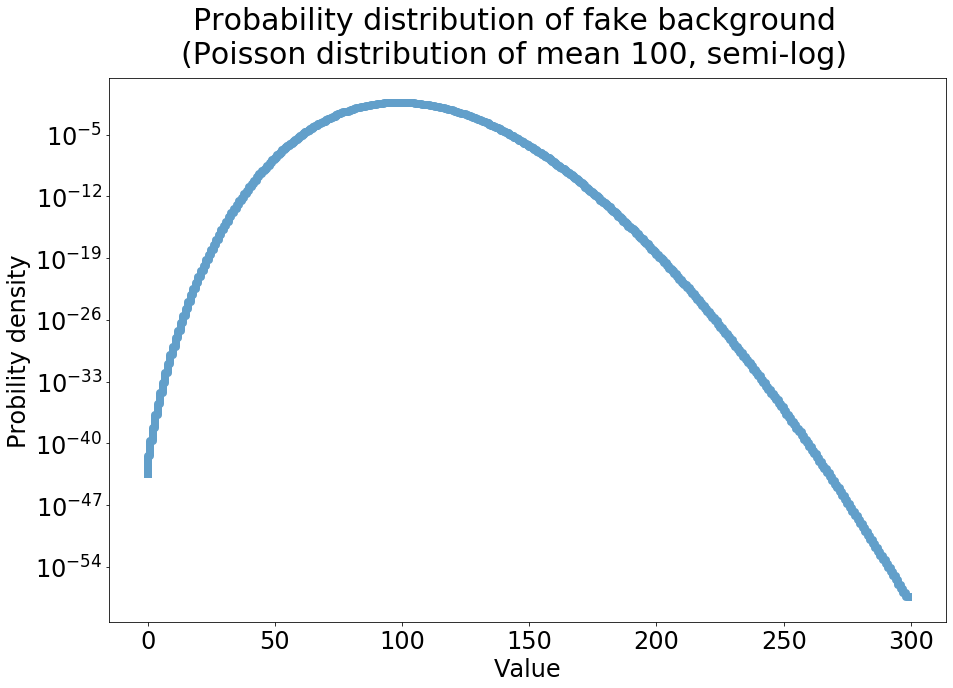

In [58]:
plt.suptitle('Probability distribution of fake background\n(Poisson distribution of mean 100, semi-log)', fontsize=30)
plt.xlabel('Value', fontsize = 24)
plt.ylabel('Probility density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
x = np.arange(0,300)
plt.step(x, stats.poisson.pmf(x, 100, loc=0), linewidth = 8,alpha = 0.7)
plt.show()

# Problem 1

We will be finding the 5-sigma threashold for our generated background.

In [33]:
sigma5 = stats.norm.sf(5, loc=0, scale=1)
sigma5

2.866515718791933e-07

In [34]:
thu = stats.poisson.isf(sigma5, 100, loc=0)
thu

154.0

In [35]:
thd = stats.poisson.ppf(sigma5, 100, loc=0)
thd

54.0

Our $5\sigma$ sensitivty threasholds are **54** (lower) and **154** (upper).

# Problem 2

In [39]:
sigma1 = stats.norm.sf(1, loc=0, scale=1)
sigma1_pois = stats.poisson.isf(sigma1, 100, loc=0)
sigma1_pois

110.0

1-sigma is about 10 for our case, and we want the inserted data to be 8 to 30 sigma.

We'll just get a random value from between these as the signal.

178 is a good value.

In [186]:
signal = 178

We'll attempt to insert the signal into the background 1000 times.
<br>All 50 background values will be generated from the Poisson distribution with the same parameters as our background.

In [266]:
insertions = stats.poisson.rvs(100, loc=0, size=100000) + signal

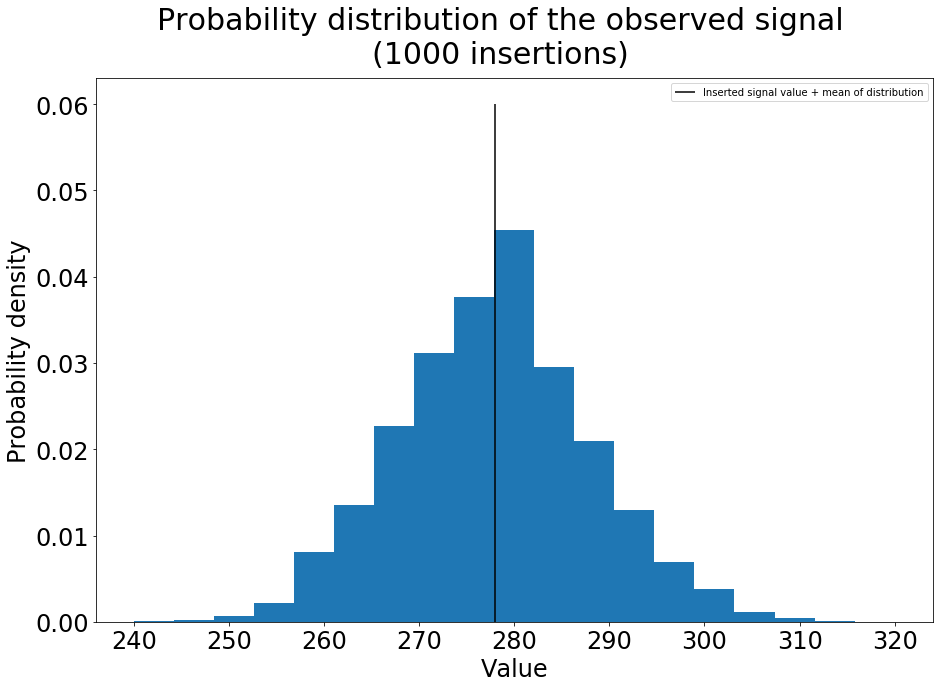

In [267]:
plt.suptitle('Probability distribution of the observed signal\n(1000 insertions)', fontsize=30)
plt.xlabel('Value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.hist(insertions,  bins = np.linspace(240,320,20), density = True)
plt.vlines(signal + 100, ymin = 0, ymax = 0.06, label = 'Inserted signal value + mean of distribution')
plt.legend()
plt.show()

From the histogram, it looks like some kind of gaussian distribution with a high count near the mean and low count near the tails of each end.

The histogram shows us the likelyhood of observing one known signal injected into 1000 random background values characterized by a Poission distribution background of size 100.

In [279]:
(insertions < signal + 100).sum()

48931

In [278]:
(insertions > signal + 100).sum()

47078

In [270]:
(insertions == signal + 100).sum()

3991

The observed signal is slightly biased. 

We have 493 observed signal smaller than the true signal and 459 observed signals greater than the true signal.
<br>Thus, the observed value is more likely to be weaker than the true signal than stronger.
<br>The histogram itself also appears to be slightly asymmetric.

# Problem 3

Assume signal strength is true

We will attempt to generate 100000 signals from a uniform distribution from 0 to 20 sigma.

In [196]:
sgnl = np.random.randint(0, 200, 1000000)

In [197]:
bkgd = stats.poisson.rvs(100, loc=0, size=1000000)

Text(0.5, 0, 'Observed data, $P(d|s)$')

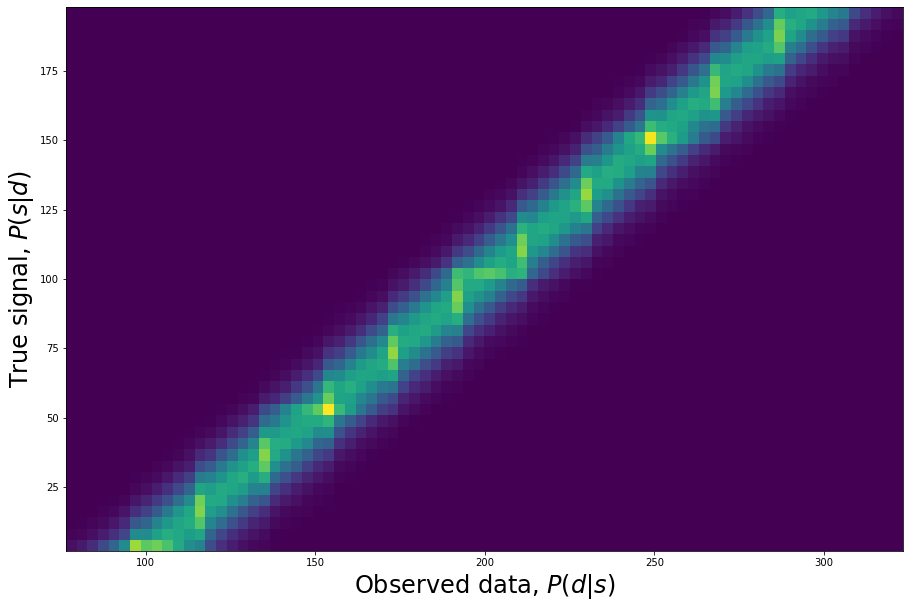

In [283]:
data = bkgd + sgnl

signaledges = np.linspace(0,200,50)
dataedges = np.linspace(75,325,80)

Psd, temp, temp2= np.histogram2d(data,sgnl, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

In [212]:
print(signaledges)
print(signaledges[44])

[  0.           4.08163265   8.16326531  12.24489796  16.32653061
  20.40816327  24.48979592  28.57142857  32.65306122  36.73469388
  40.81632653  44.89795918  48.97959184  53.06122449  57.14285714
  61.2244898   65.30612245  69.3877551   73.46938776  77.55102041
  81.63265306  85.71428571  89.79591837  93.87755102  97.95918367
 102.04081633 106.12244898 110.20408163 114.28571429 118.36734694
 122.44897959 126.53061224 130.6122449  134.69387755 138.7755102
 142.85714286 146.93877551 151.02040816 155.10204082 159.18367347
 163.26530612 167.34693878 171.42857143 175.51020408 179.59183673
 183.67346939 187.75510204 191.83673469 195.91836735 200.        ]
179.59183673469389


We inserted a true signal of 178 in problem 2, which is closest to signaledges[44].

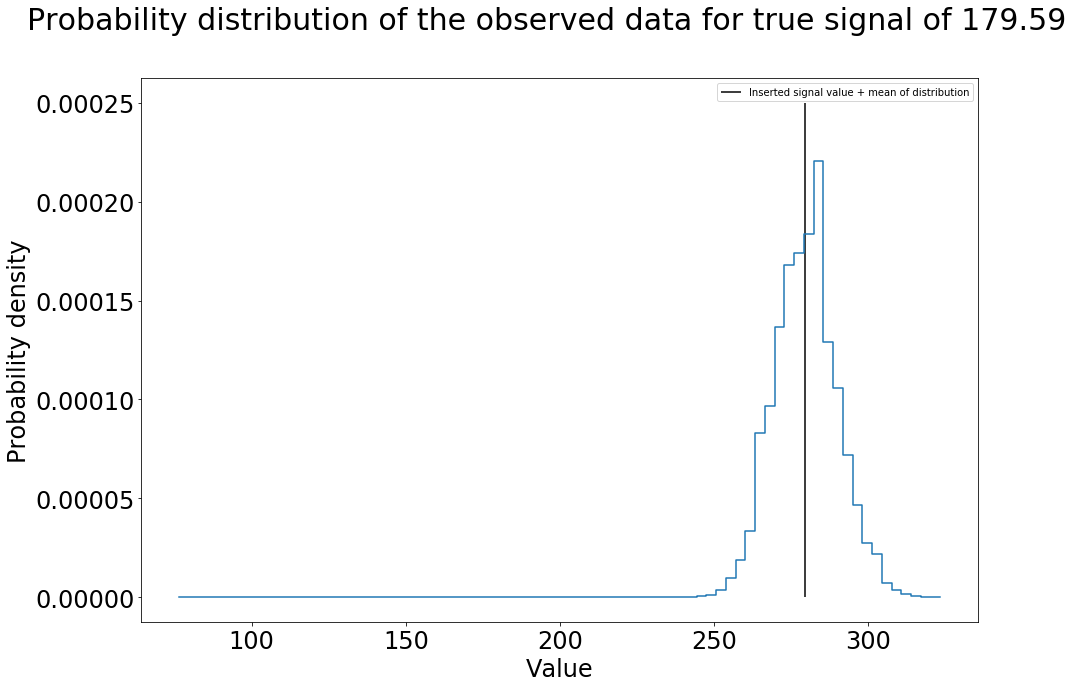

In [271]:
plt.suptitle('Probability distribution of the observed data for true signal of 179.59', fontsize=30)
plt.xlabel('Value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.vlines(signaledges[44] + 100, ymin = 0, ymax = 0.00025, label = 'Inserted signal value + mean of distribution')
plt.step(datacenters, Psd[:,44])
plt.legend()
plt.show()

In [258]:
signaledges[44] + 100

279.59183673469386

In [263]:
dataedges[64]

277.53164556962025

In [276]:
dataedges[65]

280.69620253164555

It seems that the first 65 entries of our function is below the true signal, and the rest is above.

In [281]:
np.sum(Psd[0:65,44])/np.sum(Psd[:,44])

0.46906958091036743

In [275]:
np.sum(Psd[65:,44])/np.sum(Psd[:,44])

0.5309304190896327

In [253]:
Psd[0:2,44]

array([0., 0.])

In [239]:
total = np.sum(Psd[:,44])
sum = 0
for i in np.arange(len(datacenters)):
    if sum/total >= sigma1:
        break
    sum += Psd[i,44]
print(i)
obs_threashold_lo = datacenters[i]
obs_threashold_lo

62


272.7848101265823

In [240]:
sum = 0
for i in np.arange(len(datacenters)):
    if sum/total >= sigma1:
        break
    sum += Psd[len(datacenters) - 1 - i,44]
print(i)
obs_threashold_hi = datacenters[len(datacenters) - 1 - i]
obs_threashold_hi

11


288.6075949367089

In [218]:
print(dataedges)
dataedges[27]

[ 75.          78.16455696  81.32911392  84.49367089  87.65822785
  90.82278481  93.98734177  97.15189873 100.3164557  103.48101266
 106.64556962 109.81012658 112.97468354 116.13924051 119.30379747
 122.46835443 125.63291139 128.79746835 131.96202532 135.12658228
 138.29113924 141.4556962  144.62025316 147.78481013 150.94936709
 154.11392405 157.27848101 160.44303797 163.60759494 166.7721519
 169.93670886 173.10126582 176.26582278 179.43037975 182.59493671
 185.75949367 188.92405063 192.08860759 195.25316456 198.41772152
 201.58227848 204.74683544 207.91139241 211.07594937 214.24050633
 217.40506329 220.56962025 223.73417722 226.89873418 230.06329114
 233.2278481  236.39240506 239.55696203 242.72151899 245.88607595
 249.05063291 252.21518987 255.37974684 258.5443038  261.70886076
 264.87341772 268.03797468 271.20253165 274.36708861 277.53164557
 280.69620253 283.86075949 287.02531646 290.18987342 293.35443038
 296.51898734 299.6835443  302.84810127 306.01265823 309.17721519
 312.341772

160.44303797468353

We know our background has a sigma-5 value of 154. dataedges[27] looks like a good choice. 

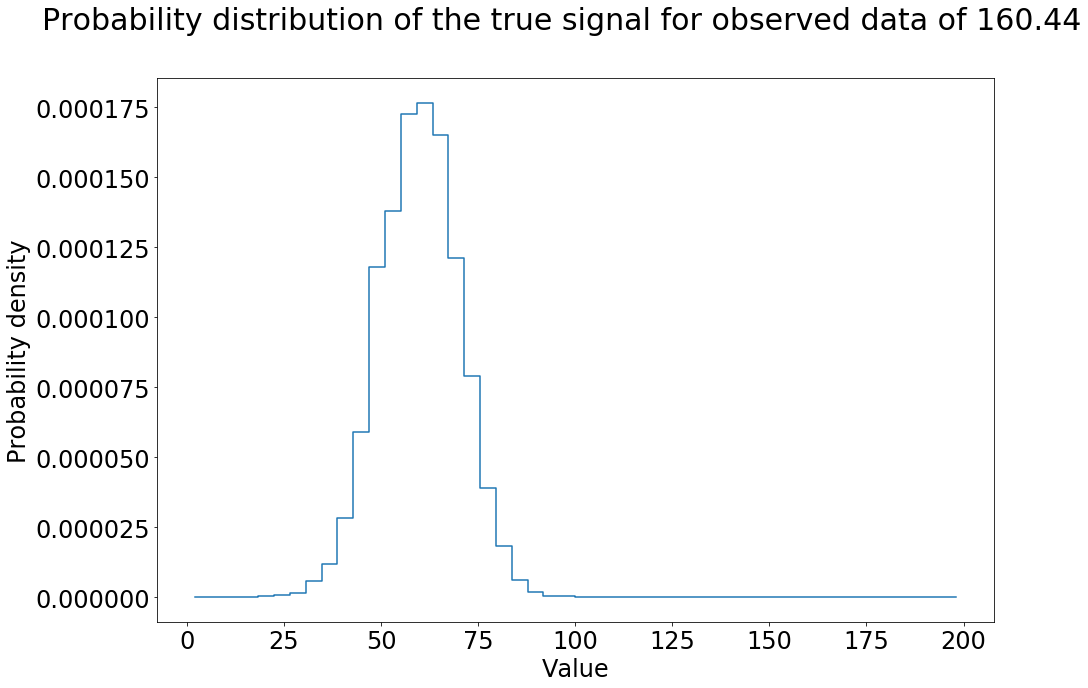

In [245]:
plt.suptitle('Probability distribution of the true signal for observed data of 160.44', fontsize=30)
plt.xlabel('Value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.step(signalcenters, Psd[27,:])
plt.show()

In [246]:
total = np.sum(Psd[27,:])
sum = 0
for i in np.arange(len(signalcenters)):
    if sum/total >= sigma1:
        break
    sum += Psd[27,i]
print(i)
tru_threashold_lo = signalcenters[i]
tru_threashold_lo

13


55.102040816326536

In [247]:
sum = 0
for i in np.arange(len(signalcenters)):
    if sum/total >= sigma1:
        break
    sum += Psd[27, len(signalcenters) - 1 - i]
print(i)
tru_threashold_hi = datacenters[len(signalcenters) - 1 - i]
tru_threashold_hi

32


127.21518987341773

In [257]:
total = np.sum(Psd[27,:])
sum = 0
for i in np.arange(len(signalcenters)):
    if sum/total >= 0.5:
        break
    sum += Psd[27,i]
print(i)
tru_threashold_mean = signalcenters[i]
tru_threashold_mean

16


67.34693877551021